In [17]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [18]:
# Load Data

files = glob.glob("/content/drive/MyDrive/A03_data/training_data/order_data/*")
data = [pd.read_csv(f, header=None) for f in files]
data = pd.concat(data, ignore_index=True)
data = data.iloc[:, 0].str.split("\t", expand=True)
data.columns = [
    "order_id",
    "driver_id",
    "passenger_id",
    "start_region_hash",
    "dest_region_hash",
    "Price",
    "Time",
]

region = pd.read_csv("/content/drive/MyDrive/A03_data/training_data/cluster_map/cluster_map", header=None)
region = region.iloc[:, 0].str.split("\t", expand=True)
region.columns = ["region_hash", "region_id"]

In [19]:
region

,region_hash,region_id
0,90c5a34f06ac86aee0fd70e2adce7d8a,1
1,f2c8c4bb99e6377d21de71275afd6cd2,2
2,58c7a4888306d8ff3a641d1c0feccbe3,3
3,b26a240205c852804ff8758628c0a86a,4
4,4b9e4cf2fbdc8281b8a1f9f12b80ce4d,5
...,...,...
61,a735449c5c09df639c35a7d61fad3ee5,62
62,0a5fef95db34383403d11cb6af937309,63
63,bf44d327f0232325c6d5280926d7b37d,64
64,825a21aa308dea206adb49c4b77c7805,65


In [20]:
data

,order_id,driver_id,passenger_id,start_region_hash,dest_region_hash,Price,Time
0,f9520e86490d211c46a87e0174a74470,NULL,0d9fc23e4dc64bd451a167e97105bfe8,d4ec2125aff74eded207d2d915ef682f,82cc4851f9e4faa4e54309f8bb73fd7c,19,2016-01-03 20:34:50
1,c7f2b3f02f83a8d5714d58f2870f3e3c,511d59b8a33f6a03cf6c2fa016dcd733,6e0ce58b2e95e99f1312893241dce224,38d5ad2d22b61109fd8e7b43cd0e8901,d1ab2cc538d518758a1a82b1787592d4,30,2016-01-03 11:44:18
2,07207d484e2be58eb6499af6bb68f0f5,cd46920366d26e3262c9994ffcbb2a29,484c8346a0ac30749398da328d8f968c,929ec6c160e6f52c20a4217c7978f681,82cc4851f9e4faa4e54309f8bb73fd7c,5,2016-01-03 14:21:43
3,f544d1eefc088e32d3a794c8d93dd515,f3ea77125300c2354ac27031fb0aff92,1fac4ec553276004862d90c58bbe6084,74c1c25f4b283fa74a5514307b0d0278,91690261186ae5bee8f83808ea1e4a01,22,2016-01-03 17:09:25
4,43011cd6f0ebd51e409190cd0a01f503,NULL,4f55c9df2c8a7fee714ac82cc23f237f,693a21b16653871bbd455403da5412b4,62afaf3288e236b389af9cfdc5206415,69,2016-01-03 22:27:23
...,...,...,...,...,...,...,...
8540609,bd8a9bf5b67410db604b891aa191a00c,07db6e1e7d47502534d87ace25855099,2d139cd595575365e4e7a988cf363da4,b702e920dcd2765e624dc1ce3a770512,b702e920dcd2765e624dc1ce3a770512,7,2016-01-18 16:58:12
8540610,a4a56ab33802c16262e24b772f302f71,905b7ba9df92dd6a6029273a59d8b5fb,a7ef1db365c3242b289b22b3404daec8,fc34648599753c9e74ab238e9a4a07ad,2b9ef61883e80c38eb9a49e2dd56ba89,7,2016-01-18 18:39:02
8540611,675217e8d3d855dbbd1c04382f39694a,295884a94ca59878e36ab7e7ab26713d,9fda50131f91f7560ad5dfd0dd700b47,82cc4851f9e4faa4e54309f8bb73fd7c,4725c39a5e5f4c188d382da3910b3f3f,20,2016-01-18 15:50:05
8540612,c67315d6d096d1a093b03421c6ee8af6,d7c69d0a23302022441f55c7f770b3bf,cd5e609832e507f58966b27f8144f8dc,b05379ac3f9b7d99370d443cfd5dcc28,82cc4851f9e4faa4e54309f8bb73fd7c,11.4,2016-01-18 21:11:26


In [21]:
region_ids = region["region_id"]

region_list = [region for region in region_ids for _ in range(144)]
time_slots = list(range(0, 144)) * len(region_ids)

df = pd.DataFrame({"region_id": region_list, "time_slot": time_slots, "orders_count": 0, "unfulfilled_orders_count": 0, "gap": 0})

df

,region_id,time_slot,orders_count,unfulfilled_orders_count,gap
0,1,0,0,0,0
1,1,1,0,0,0
2,1,2,0,0,0
3,1,3,0,0,0
4,1,4,0,0,0
...,...,...,...,...,...
9499,66,139,0,0,0
9500,66,140,0,0,0
9501,66,141,0,0,0
9502,66,142,0,0,0


In [22]:
# Match the start region hash in data to the region hash in region
data["start_region_id"] = data["start_region_hash"].map(region.set_index("region_hash")["region_id"])

# Calculate the time slot
data["time_slot"] = data["Time"].str.split(" ").str[1].str.split(":").apply(lambda x: (int(x[0]) * 60 + int(x[1])) // 10)

# Group by start region id and time slot, and count the number of orders and unfulfilled orders
df = data.groupby(["start_region_id", "time_slot"]).agg(orders_count=("driver_id", lambda x: x.ne("NULL").sum()), unfulfilled_orders_count=("driver_id", lambda x: x.eq("NULL").sum())).reset_index()


In [66]:
# Calculate the gap
df["gap"] = df["orders_count"] - df["unfulfilled_orders_count"]

df

,start_region_id,time_slot,orders_count,unfulfilled_orders_count,gap
0,1,0,1492,133,1359
1,1,1,1286,109,1177
2,1,2,1190,95,1095
3,1,3,1088,62,1026
4,1,4,1029,54,975
...,...,...,...,...,...
9309,9,139,352,20,332
9310,9,140,324,23,301
9311,9,141,310,14,296
9312,9,142,334,40,294


In [54]:
# Model Training
X = df[["start_region_id", "time_slot"]]  # input data
y = df["gap"]  # output data

# Convert 'time_slot' from string to datetime and then to timestamp
# X.loc[:, "time_slot"] = (pd.to_datetime(X["time_slot"]).astype(int) / 10**9).astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [55]:
predicted_gap = model.predict(X_test)
predicted_gap

array([  19.06746498, 1309.30345804, 1087.43996325, ..., 1085.21580191,
        248.52299743,  818.71963483])

In [59]:
#show model
print('Model Coefficients:')
for feature, coef in zip(X_train.columns, model.coef_):
    print(f'\t{feature}: {coef}')

Model Coefficients:
	start_region_id: -10.846445368412768
	time_slot: 6.345146835329514


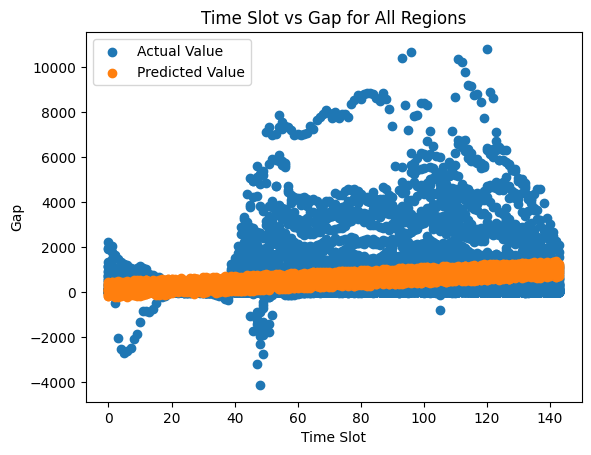

In [108]:
#Print graph
import matplotlib.pyplot as plt

plt.scatter(df['time_slot'], df['gap'], label = "Actual Value")
plt.scatter(X_test['time_slot'], predicted_gap, label="Predicted Value")
plt.xlabel('Time Slot')
plt.ylabel('Gap')
plt.title('Time Slot vs Gap for All Regions')
plt.legend()
plt.show()

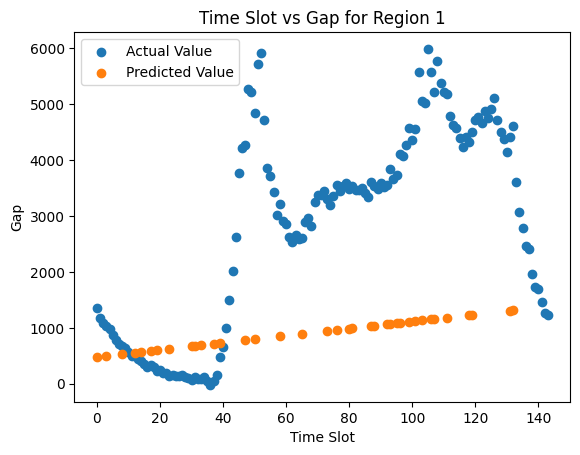

In [111]:
# Filter the data for region 1
selected_region = "1"

df_region1 = df[df["start_region_id"] == selected_region]

plt.scatter(df_region1["time_slot"], df_region1["gap"], label="Actual Value")
plt.scatter(
    X_test[X_test["start_region_id"] == selected_region]["time_slot"],
    predicted_gap[X_test["start_region_id"] == selected_region],
    label="Predicted Value"
)
plt.xlabel("Time Slot")
plt.ylabel("Gap")
plt.title(f"Time Slot vs Gap for Region {selected_region}")
plt.legend()
plt.show()